In [1]:
%load_ext autoreload
%autoreload 2
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt

# Local imports
from hat.utils.hydropower_potential import *

In [2]:
df = pd.read_csv('test.csv')

# Calculate the Hydropower potential for a stream

**Usage:**


**calculate_potential(data, rated_flow, rated_power, sys_effi= None, turb= None, head_input,  op='Timeseries', system= 'pipe', flow_column = column name)**

**Parameters:** 


**data : DataFrame**

The dataframe that contains the flow information,
              
**rated_flow : default = _None_**

Design flow/maximum capacity of the channel in cubic ft/sec (cfs), if _None_ the maximum flow of the dataframe is selected, it must be provided if **_op = Generalized_**,
                          
**rated_power: default = _None_**

Rated Nameplate capacity of the turbine (in MW), if _None_ the 75th percentile of calculated power is              selected,
             
**sys_effi: default = _None_**
             
Water to wire efficiency, default to 0.98 (98%), accepcted range between 0 to 1.0.
             
**turb: default = {_'Pelton turbine', 'Kaplan turbine', 'Francis turbine', 'Propeller turbine', 'Turgo tubine, 'Crossflow turbine'_}, default = _None_**,
             
Turbine to be utilised for calculation, if _None_ a default selection is determined based on head_input, 
             
**head_input: Float**
            
Head input provided by the user in feet (ft.),
                         
**op: {_'Timeseries', 'Generalized'_}, default = '_Timeseries_'**
             
_'Generalized'_ provides power in MW as a percentage of streamflow, _'Timeseries'_ calculates power in MW as a function of streamflow values,
             
**system: {_'pipe', 'canal', 'reservoir'_}**
             
User provides the infrastucture type to determine the head loss, **_default='pipe'_**
             
**flow_column: String**
             
Column name that contains the flow values.
             
**_Returns_: power, effi_cal**
            
Turbine power in MW and Efficiency in percentage as objects

In [35]:
# Calculate the hydropower potential
turbine = calculate_potential(df, rated_flow=None,rated_power=None,sys_effi=None, turb= None, head_input=50,op='Timeseries', system='pipe', 
                        flow_column='discharge_q0.025')

In [36]:
turbine.effi_cal

[88.36061825307065,
 88.37274089687513,
 88.42821473948919,
 88.48664600805876,
 88.53425947259026,
 88.58999288923191,
 88.635925234169,
 88.6685756854387,
 88.70211983424538,
 88.72470749144388,
 88.74145268611676,
 88.75574890936008,
 88.76656160991865,
 88.77415784862684,
 88.77835780948826,
 88.78131388931813,
 88.78160276276702,
 88.78318173308851,
 88.78353355549183,
 88.7843611479148,
 88.78395245727671,
 88.78484622872939,
 88.78543525188755,
 88.78569325492035,
 88.78595649055906,
 88.78610054601079,
 88.78639868924402,
 88.78652379127077,
 88.78664366153774,
 88.78672773302405,
 88.78678123932023,
 88.7868125166559,
 88.78683682396617,
 88.78685543299395]

In [32]:
# Copying the results into a dataframe that includes flow, power, and efficiency
turbine_power = df.copy()
turbine_power['power_mw'] = turbine.power
turbine_power['efficiency_per'] = turbine.effi_cal

In [27]:
turbine_power.head()

,discharge_q0.025,power_mw,efficiency_per
0,9.472790,0.020601,87.010610
1,9.461430,0.020601,87.022547
2,9.405613,0.020601,87.077174
3,9.338418,0.020601,87.134712
4,9.275050,0.020601,87.181598


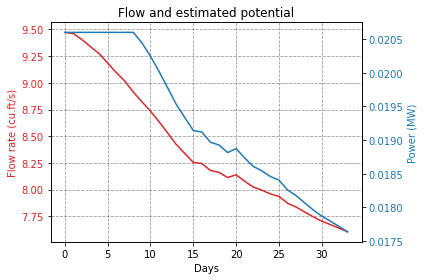

In [28]:
df = turbine_power.copy()
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Days')
ax1.set_ylabel('Flow rate (cu.ft/s)', color=color)
ax1.plot(df['discharge_q0.025'], label="Flow rate", color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Power (MW)', color=color)  # we already handled the x-label with ax1
ax2.plot(df['power_mw'],'b-',label="Power", color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax1.grid(True, axis='both', color='k',linestyle='--',alpha=0.4)
plt.title("Flow and estimated potential")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig(os.path.join('..','fig','usgs_twin_falls_flow_power.jpg'))
plt.show()

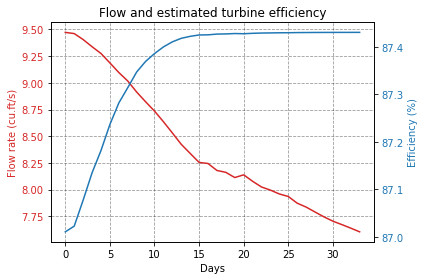

In [29]:
df = turbine_power.copy()
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Days')
ax1.set_ylabel('Flow rate (cu.ft/s)', color=color)
ax1.plot(df['discharge_q0.025'], label="Flow rate", color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Efficiency (%)', color=color)  # we already handled the x-label with ax1
ax2.plot(df['efficiency_per'],'b-',label="Power", color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax1.grid(True, axis='both', color='k',linestyle='--',alpha=0.4)
plt.title("Flow and estimated turbine efficiency")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig(os.path.join('..','fig','usgs_twin_falls_flow_power.jpg'))
plt.show()

In [16]:
#Save the created dataframe as csv file
df.to_csv('test_potential.csv', index=False)